<a href="https://colab.research.google.com/github/imamol555/Data-Analysis-/blob/master/E_Commerce_Data_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of E-Commerce Data

###"Torture the data, and it will confess to anything."

— Ronald Coase

# Context of Data
Company - UK-based and registered non-store online retail

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)

Transactions Period - **<span class="mark">1st Dec 2010 - 9th Dec 2011</span>** (One year)

Source - https://www.kaggle.com/carrie1/ecommerce-data


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
#warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [0]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [0]:
# specify encoding to deal with different formats
df = pd.read_csv('ecom_data.csv', encoding = 'ISO-8859-1')

In [0]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [0]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [0]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# <span class="mark">Data Cleaning</span> 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37309 entries, 0 to 37308
Data columns (total 8 columns):
invoice_num     37309 non-null object
stock_code      37309 non-null object
description     37192 non-null object
quantity        37309 non-null int64
invoice_date    37309 non-null object
unit_price      37308 non-null float64
cust_id         24429 non-null float64
country         37308 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ MB


## Check missing values for each column 

In [0]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

cust_id         12880
description       117
country             1
unit_price          1
invoice_date        0
quantity            0
stock_code          0
invoice_num         0
dtype: int64

In [0]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [0]:
#df = df[df['invoice_date'] != '12/17/20']

In [0]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Remove rows with missing values 

In [0]:
# df_new without missing values
df_new = df.dropna()

In [0]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

country         0
cust_id         0
unit_price      0
invoice_date    0
quantity        0
description     0
stock_code      0
invoice_num     0
dtype: int64

In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24429 entries, 0 to 37307
Data columns (total 8 columns):
invoice_num     24429 non-null object
stock_code      24429 non-null object
description     24429 non-null object
quantity        24429 non-null int64
invoice_date    24429 non-null datetime64[ns]
unit_price      24429 non-null float64
cust_id         24429 non-null float64
country         24429 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.7+ MB


In [0]:
# change columns tyoe - float64 to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_new.head(100)

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
5,536365,2010-12-01 08:26:00,201012,12,3,8,22752,set 7 babushka nesting boxes,2,7.65,15.30,17850,United Kingdom
6,536365,2010-12-01 08:26:00,201012,12,3,8,21730,glass star frosted t-light holder,6,4.25,25.50,17850,United Kingdom
7,536366,2010-12-01 08:28:00,201012,12,3,8,22633,hand warmer union jack,6,1.85,11.10,17850,United Kingdom
8,536366,2010-12-01 08:28:00,201012,12,3,8,22632,hand warmer red polka dot,6,1.85,11.10,17850,United Kingdom
9,536367,2010-12-01 08:34:00,201012,12,3,8,84879,assorted colour bird ornament,32,1.69,54.08,13047,United Kingdom


In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24429 entries, 0 to 37307
Data columns (total 8 columns):
invoice_num     24429 non-null object
stock_code      24429 non-null object
description     24429 non-null object
quantity        24429 non-null int64
invoice_date    24429 non-null datetime64[ns]
unit_price      24429 non-null float64
cust_id         24429 non-null int64
country         24429 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.7+ MB


In [0]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,24429.00,24429.00,24429.00
mean,10.75,3.20,15540.03
std,75.22,6.11,1731.74
min,-9360.00,0.00,12347.00
25%,1.00,1.25,14210.00
50%,4.00,2.10,15570.00
75%,12.00,3.75,17158.00
max,2880.00,295.00,18269.00


## Remove **Quantity** with negative values

In [0]:
df_new = df_new[df_new.quantity > 0]

In [0]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,23869.00,23869.00,23869.00
mean,11.63,3.12,15547.04
std,45.57,5.16,1734.17
min,1.00,0.00,12347.00
25%,2.00,1.25,14220.00
50%,4.00,2.10,15574.00
75%,12.00,3.75,17189.00
max,2880.00,295.00,18269.00


## Add the column - amount_spent 

In [0]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [0]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

## Add the columns - Month, Day and Hour for the invoice 

In [0]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [0]:
df_new.head(50)

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
5,536365,2010-12-01 08:26:00,201012,12,3,8,22752,set 7 babushka nesting boxes,2,7.65,15.30,17850,United Kingdom
6,536365,2010-12-01 08:26:00,201012,12,3,8,21730,glass star frosted t-light holder,6,4.25,25.50,17850,United Kingdom
7,536366,2010-12-01 08:28:00,201012,12,3,8,22633,hand warmer union jack,6,1.85,11.10,17850,United Kingdom
8,536366,2010-12-01 08:28:00,201012,12,3,8,22632,hand warmer red polka dot,6,1.85,11.10,17850,United Kingdom
9,536367,2010-12-01 08:34:00,201012,12,3,8,84879,assorted colour bird ornament,32,1.69,54.08,13047,United Kingdom


# <span class="mark">Exploratory Data Analysis (EDA)</span> 

## How many orders made by the customers? 

In [0]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12347,Iceland,31
1,12348,Finland,17
2,12370,Austria,8
3,12370,Cyprus,83
4,12386,Australia,8


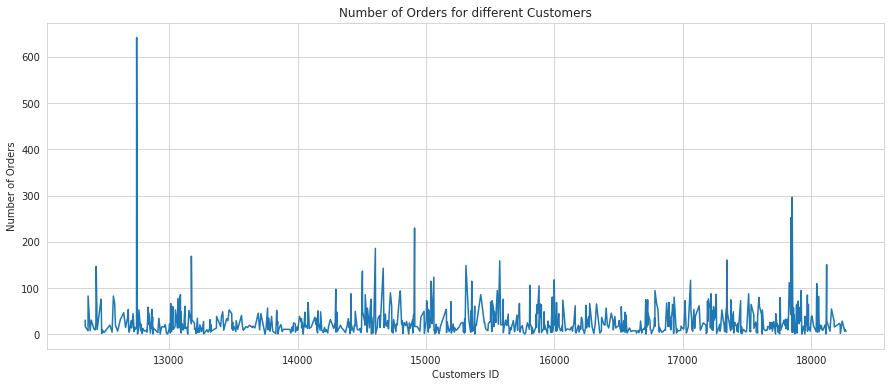

In [0]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Check TOP 5 most number of orders 

In [0]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
42,12748,United Kingdom,642
762,17850,United Kingdom,297
760,17841,United Kingdom,253
324,14911,EIRE,230
280,14606,United Kingdom,186


## How much money spent by the customers?

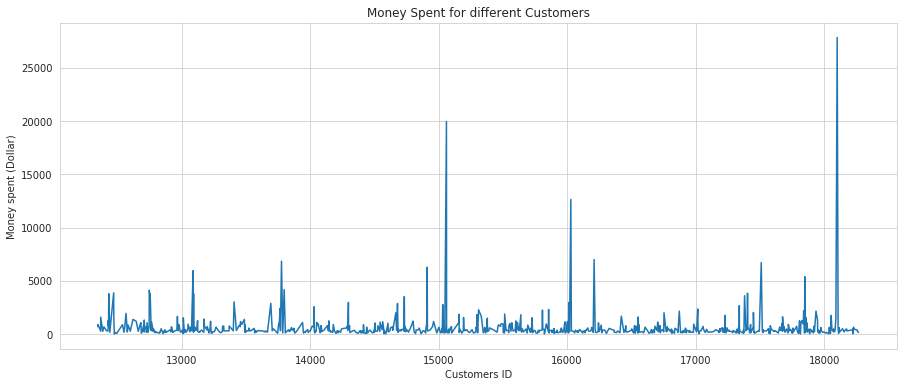

In [0]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### Check TOP 5 highest money spent 

In [0]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
819,18102,United Kingdom,27834.61
344,15061,United Kingdom,19950.66
489,16029,United Kingdom,12633.12
514,16210,United Kingdom,7000.64
171,13777,United Kingdom,6840.16


# Discover patterns for **<span class="girk">Number of Orders</span>** 
Credit: https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

## How many orders (per month)?

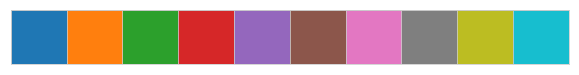

In [0]:
# color available
sns.palplot(color)

In [0]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [0]:
df_new.groupby('invoice_num')['year_month'].unique().value_counts()

[201012]    1272
Name: year_month, dtype: int64

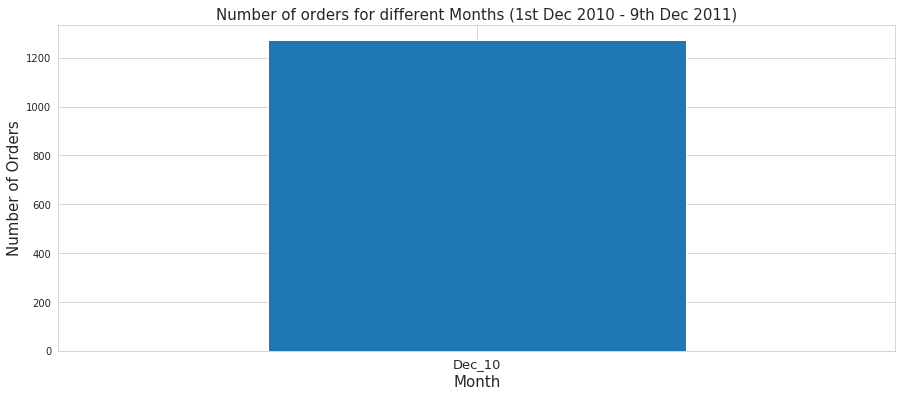

In [0]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [0]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

[1]    158
[2]    152
[3]    302
[4]    348
[5]    182
[7]    130
Name: day, dtype: int64

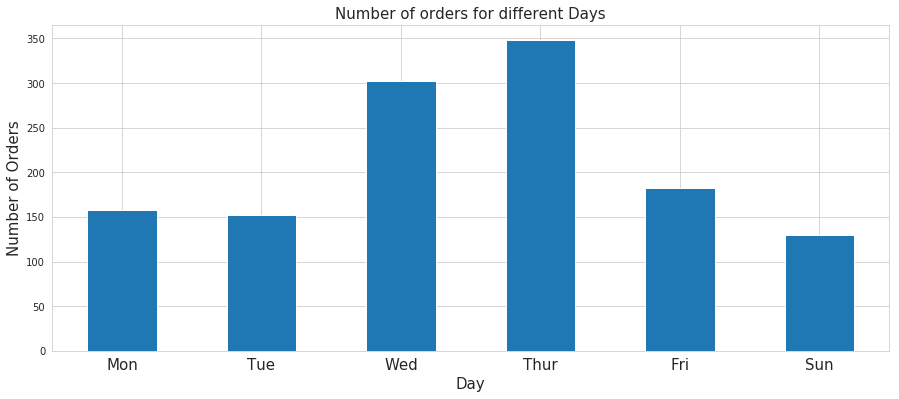

In [0]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## How many orders (per hour)?

In [0]:
df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

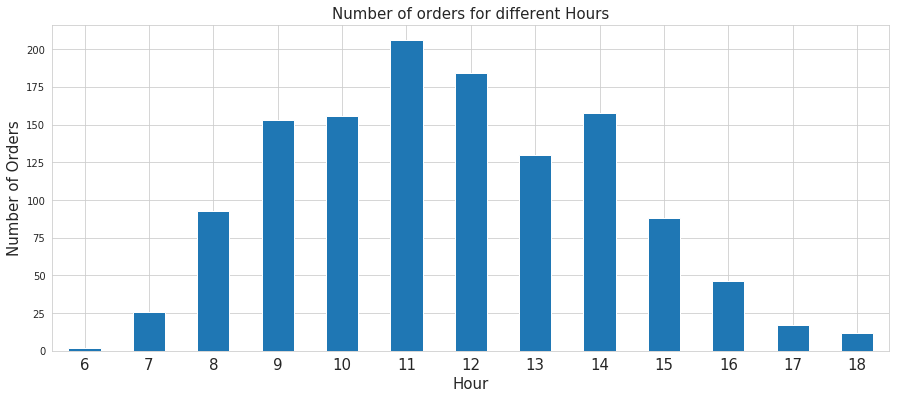

In [0]:
ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

# Discover patterns for **<span class="girk">Unit Price</span>**

In [0]:
df_new.unit_price.describe()

count    23869.000000
mean         3.118218
std          5.162474
min          0.000000
25%          1.250000
50%          2.100000
75%          3.750000
max        295.000000
Name: unit_price, dtype: float64

**We see that there are unit price = 0 (FREE items)**

<span class="mark">There are some free items given to customers from time to time</span>.

In [0]:
df_free = df_new[df_new.unit_price == 0]

In [0]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom


In [0]:
df_free.year_month.value_counts().sort_index()

201012    2
Name: year_month, dtype: int64

**Not clear why there are FREE items given to certain customers**
- On average, the company <span class="mark">gave out 2-4 times FREE items</span> to customers <span class="mark">each month (Except in June 2011)</span>

# Discover patterns for each **<span class="girk">Country</span>**

In [0]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## How many orders for each country?

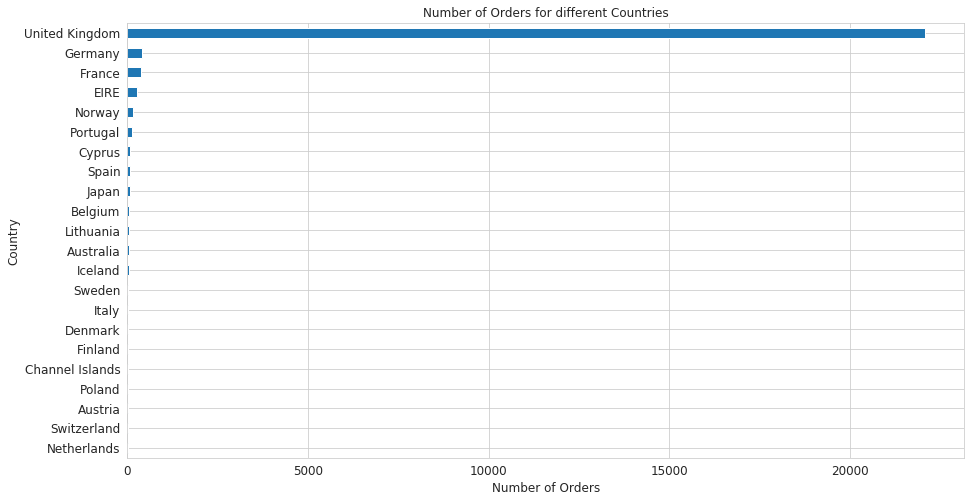

In [0]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

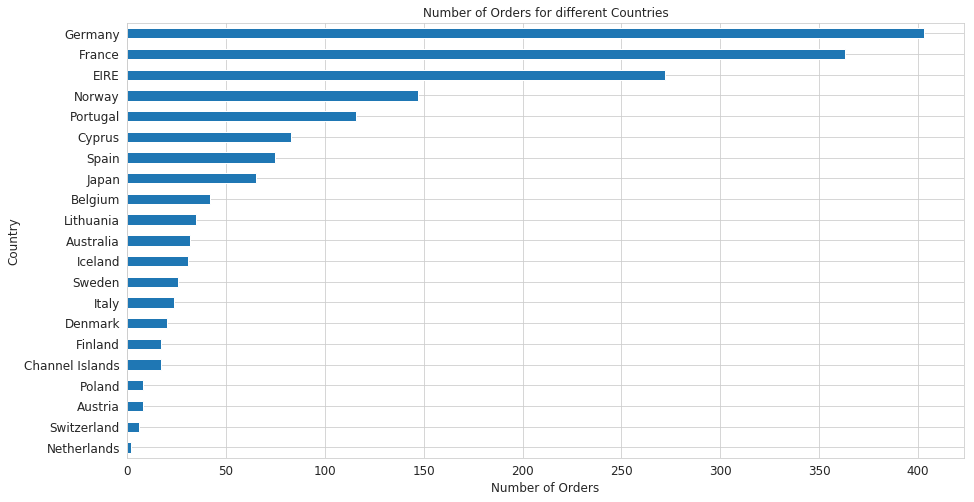

In [0]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## How much money spent by each country?

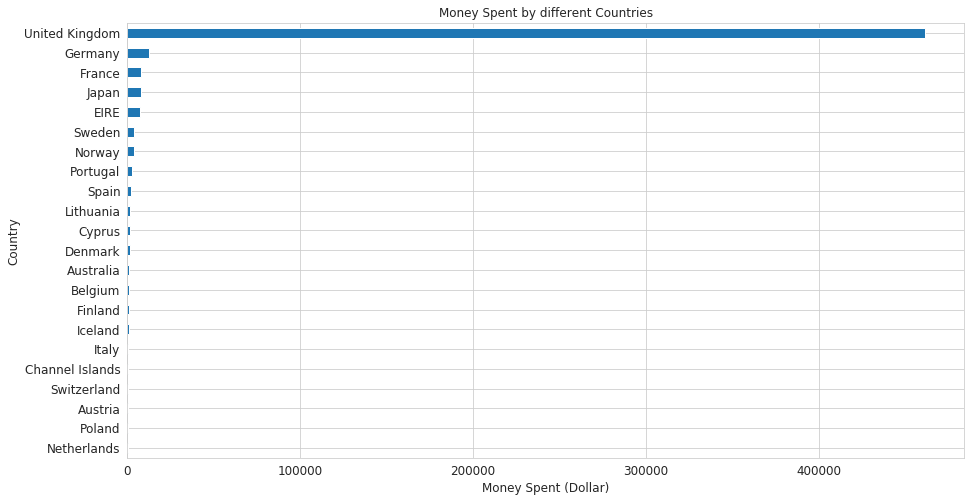

In [0]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

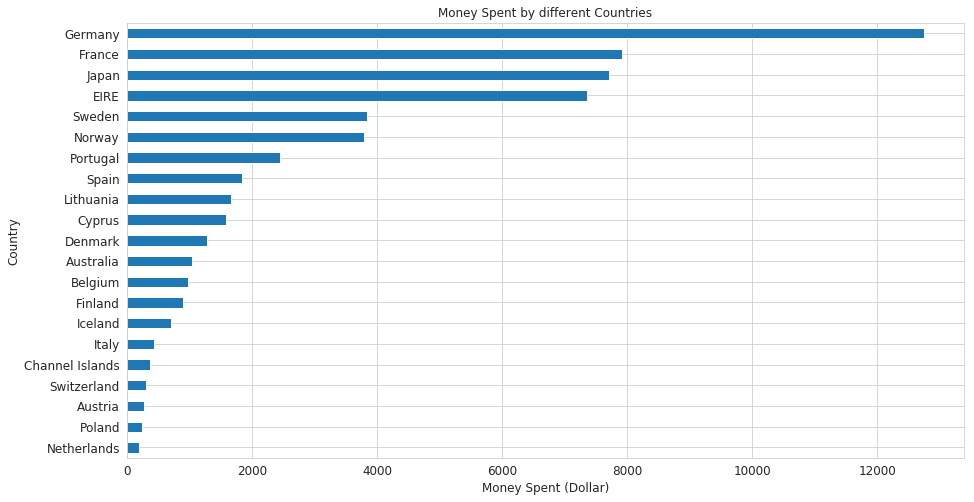

In [0]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

# Results obtained from Exploratory Data Analysis (EDA)

1. The **customer with the highest number of orders comes from the United Kingdom (UK)** 
2. The **customer with the highest money spent on purchases comes from Netherlands** 
3. The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below: 
    - United Kingdom 
	- Germany 
	- France
	- Ireland (EIRE)
	- Spain
4. As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as below: 
    - United Kingdom 
	- Netherlands
	- Ireland (EIRE)
	- Germany
	- France

5. There are **no transactions on Saturday** between 1st Dec 2010 - 9th Dec 2011 
6. The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward
7. The company receives the **highest number of orders at 12:00pm** 
	- Possibly most customers made purchases during **lunch hour between 12:00pm - 2:00pm**
|